# sklearnを使ったデータの分類と標準化

In [2]:
#テストデータとトレインデータの分類
#sklearnで用意されている関数を使って分類する
from sklearn import datasets
import numpy as np
from sklearn.cross_validation import train_test_split

#Irisデータセットをロード
iris = datasets.load_iris()

#3列目4列目の特徴量を抽出
X = iris.data[:,[2,3]]
#クラスラベルを取得
y = iris.target

#トレーニングデータとテストデータに分類
#sklearnで用意されている関数を使って分離する
#全体の30%をテストデータにする
X_train,X_test,y_train,y_test = train_test_split(\
                                                X,y,test_size=0.3,random_state=0)

E:\Anaconda_3.4.2\lib\site-packages\sklearn\cross_validation.py:44: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [3]:
#StandardScalerをつかって、トレーニングデータを標準化
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()
#トレーニングデータの平均と標準偏差を計算
sc.fit(X_train)
#平均と標準偏差を用いて標準化
X_train_std = sc.transform(X_train)
X_test_std = sc.transform(X_test)


# 実装

実装方法は2つある。<br>
linear_modelのパーセプトロンは高速に行えるがデータセットが大きすぎてコンピュータのメモリに収まらないことがある<br>
SGDClassifierメソッドのパーセプトロンは確率的勾配降下法のアルゴリズムのようになっている
(SGDClassifierはオンライン学習に対応していて、partial_fitが実装されている)

## liner_modelのパーセプトロンの実装

In [4]:

#用意されている関数でパーセプトロンのインスタンスを作成
from sklearn.linear_model import Perceptron

#エポック数40,学習率0.1でパーセプトロンのインターフェイスを生成
ppn = Perceptron(n_iter=40,eta0=0.1,random_state=0,shuffle=True)

#トレーニングデータをモデルに適合させる
ppn.fit(X_train_std,y_train)

y_pred = ppn.predict(X_test_std)
print('Misclassified samples:%d' % (y_test != y_pred).sum())

Misclassified samples:4


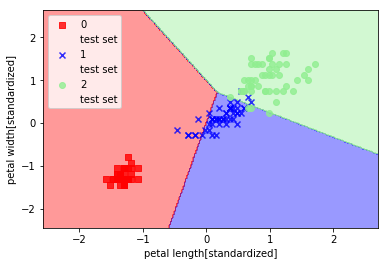

In [7]:
#トレーニングデータとテストデータの特徴量を行報告に結合
X_combined_std = np.vstack((X_train_std,X_test_std))
#トレーニングデータとテストデータのクラスラベルを結合
y_combined = np.hstack((y_train,y_test))

#決定領域をプロット
plot_decision_regions(X=X_combined_std,y=y_combined,classifier=ppn,test_idx=range(105,150))

#軸のラベルの設定
plt.xlabel('petal length[standardized]')
plt.ylabel('petal width[standardized]')
#凡例の設定（左上に配置）
plt.legend(loc='upper left')
#グラフを表示
plt.show()

## SGDClassifierのPerceptronの実装

In [9]:
#用意されている関数でパーセプトロンのインスタンスを作成
from sklearn.linear_model import SGDClassifier

#エポック数40,学習率0.1でパーセプトロンのインターフェイスを生成
sgd_ppn = SGDClassifier(loss='perceptron')

#トレーニングデータをモデルに適合させる
sgd_ppn.fit(X_train_std,y_train)

y_pred = sgd_ppn.predict(X_test_std)
print('Misclassified samples:%d' % (y_test != y_pred).sum())

Misclassified samples:12


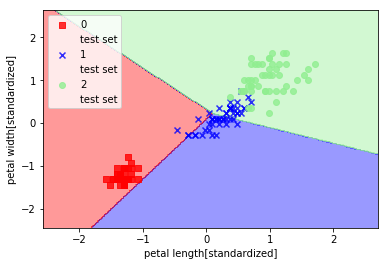

In [10]:
#トレーニングデータとテストデータの特徴量を行報告に結合
X_combined_std = np.vstack((X_train_std,X_test_std))
#トレーニングデータとテストデータのクラスラベルを結合
y_combined = np.hstack((y_train,y_test))

#決定領域をプロット
plot_decision_regions(X=X_combined_std,y=y_combined,classifier=sgd_ppn,test_idx=range(105,150))

#軸のラベルの設定
plt.xlabel('petal length[standardized]')
plt.ylabel('petal width[standardized]')
#凡例の設定（左上に配置）
plt.legend(loc='upper left')
#グラフを表示
plt.show()

# その他関数

In [6]:
from matplotlib.colors import ListedColormap
import matplotlib.pyplot as plt

def plot_decision_regions(X,y,classifier,test_idx=None,resolution=0.02):
    #マーカとカラーマップの準備
    markers = ('s','x','o','^','v')
    colors = ('red','blue','lightgreen','gray','cyan')
    cmap = ListedColormap(colors[:len(np.unique(y))])
    
    #決定領域をプロット
    x1_min,x1_max = X[:,0].min() - 1,X[:,0].max() + 1
    x2_min,x2_max = X[:,1].min() - 1,X[:,1].max() + 1
    
    #グリッドポイントの生成
    xx1,xx2 = np.meshgrid(np.arange(x1_min,x1_max,resolution), \
                         np.arange(x2_min,x2_max,resolution))
    
    #各特徴量を1智元配列に変換して予測を実行
    Z= classifier.predict(np.array([xx1.ravel(),xx2.ravel()]).T)
    
    #予測結果をもとのグリッドポイントのデータベースに変換
    Z = Z.reshape(xx1.shape)
    
    #グリッドポイントの等高線のプロット
    plt.contourf(xx1,xx2,Z,alpha=0.4,cmap=cmap)
    
    #軸の範囲の設定
    plt.xlim(xx1.min(),xx1.max())
    plt.ylim(xx2.min(),xx2.max())
    
    #クラスごとにサンプルをプロット
    for idx,cl in enumerate(np.unique(y)):
        plt.scatter(x=X[y == cl,0],y=X[y == cl,1], \
                   alpha=0.8,c=cmap(idx),marker=markers[idx],label=cl)
    
    #テストサンプルを目出させる（展を●で表示）
        if test_idx:
            X_test,y_test = X[test_idx,:],y[test_idx]
            plt.scatter(X_test[:,0],X_test[:,1],c='', \
                       alpha=1.0,linewidths=1,marker='o',s=55,label='test set')